In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
import numpy as np
import calendar
register_matplotlib_converters()

In [2]:
df = pd.read_csv("C:\\Users\\LC217BV\\Downloads\\fcc-forum-pageviews.csv")

In [3]:
df.head()

,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1304 entries, 0 to 1303
Data columns (total 2 columns):
date     1304 non-null object
value    1304 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.3+ KB


In [5]:
df = df.set_index("date")

In [6]:
df.quantile(0.025)

value    17876.4
Name: 0.025, dtype: float64

In [7]:
df.quantile(0.075)

value    24293.95
Name: 0.075, dtype: float64

In [8]:
df = df[(df['value'] <= df['value'].quantile(0.975)) & (df['value'] >= df['value'].quantile(0.025))]

In [9]:
df.index = pd.to_datetime(df.index)

In [10]:
def draw_line_plot():
    fig = plt.figure(figsize=(13, 7))
    plt.plot(df.index, df['value'])
    plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    plt.xlabel('Date')
    plt.ylabel('Page Views')
    return fig

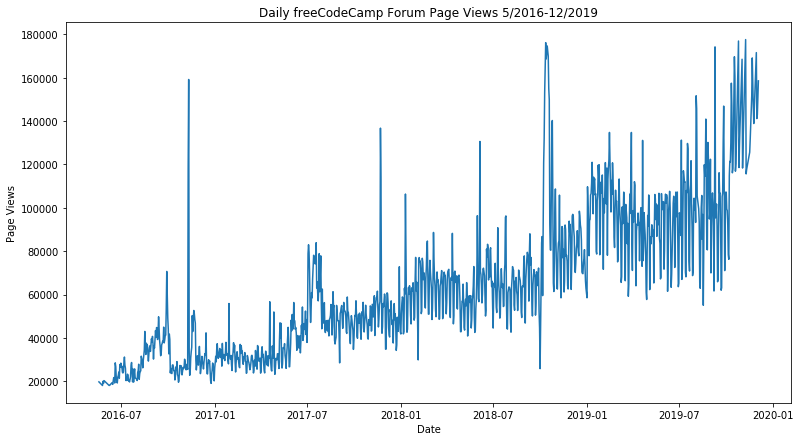

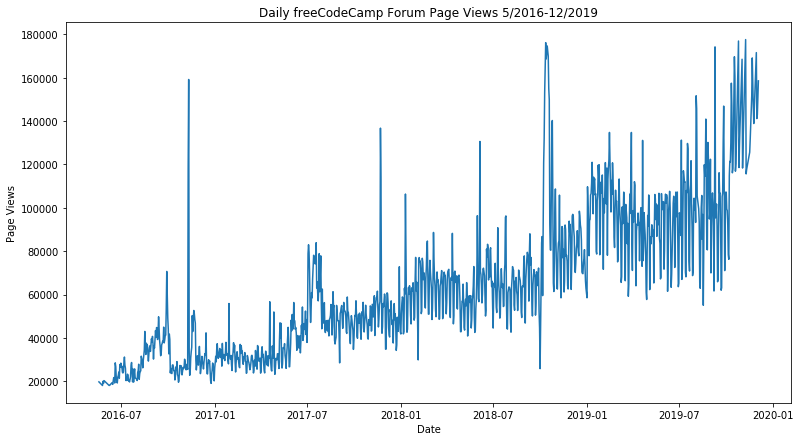

In [11]:
draw_line_plot()

In [12]:
def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar = df.copy()
    df_bar['Month'] = df_bar.index.month
    df_bar['Month'] = df_bar['Month'].apply(lambda x: calendar.month_name[x])
    df_bar['Year'] = df_bar.index.year
    df_bar = df_bar.groupby([df_bar['Month'], df_bar['Year']])['value'].agg(np.mean)
    df_bar = df_bar.reset_index()
    df_bar = pd.pivot_table(df_bar, values = 'value', index = 'Year', columns = 'Month')

    # Draw bar plot
    ax = df_bar.plot(kind = 'bar')
    fig = ax.get_figure()
    fig.set_size_inches(13, 7)
    ax.set_ylabel('Average Page Views')
    ax.set_xlabel('Years')


    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    return fig

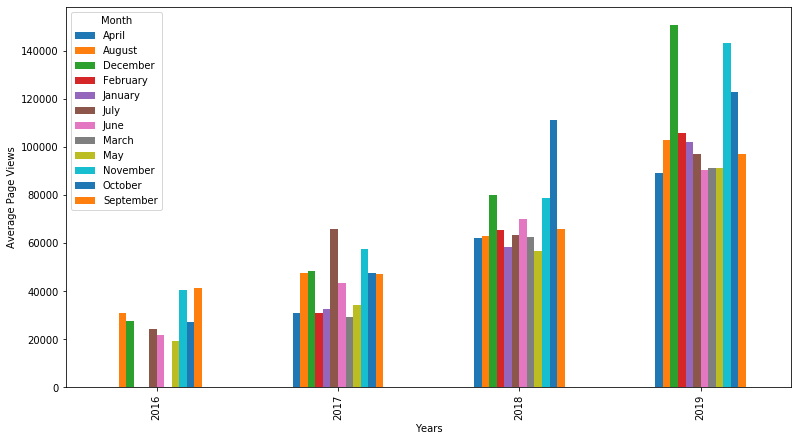

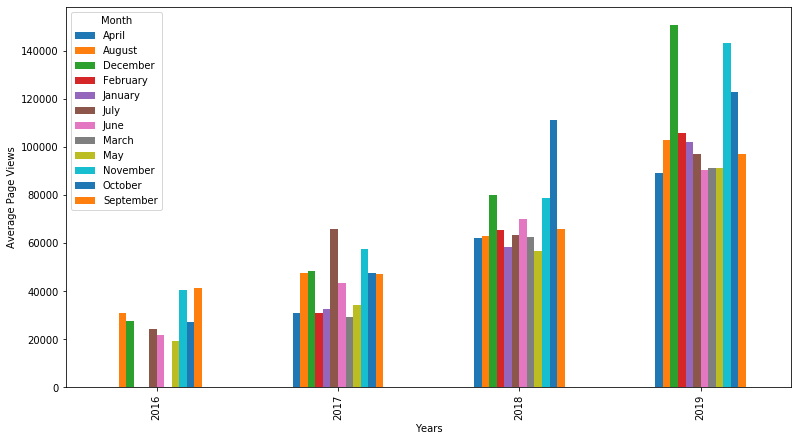

In [13]:
draw_bar_plot()

In [26]:
def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    # Draw box plots (using Seaborn)
    fig,axis = plt.subplots(1,2)
    fig.set_size_inches(13, 6)
    sns.boxplot(x = df_box['year'], y=df_box['value'], ax=axis[0]).set(xlabel='Year', ylabel='Page Views')
    sns.boxplot(x = df_box['month'], y=df_box['value'],
               order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep','Oct', 'Nov', 'Dec'],
               ax = axis[1]).set(xlabel='Month', ylabel = 'Page Views')
    axis[0].set_title('Year-wise Box Plot (Trend)')
    axis[1].set_title('Month-wise Box Plot (Seasonality)')


    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return fig

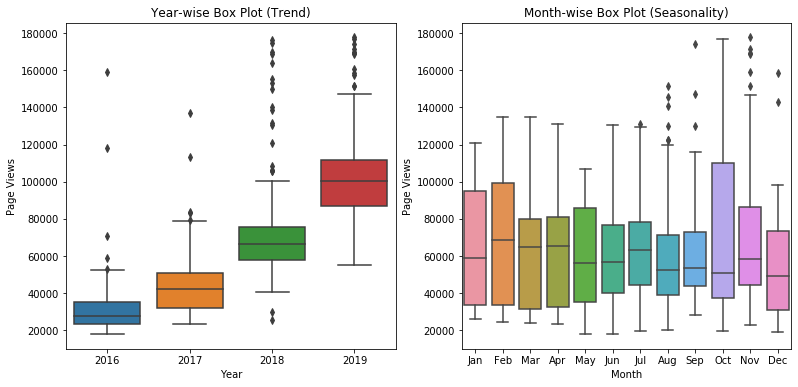

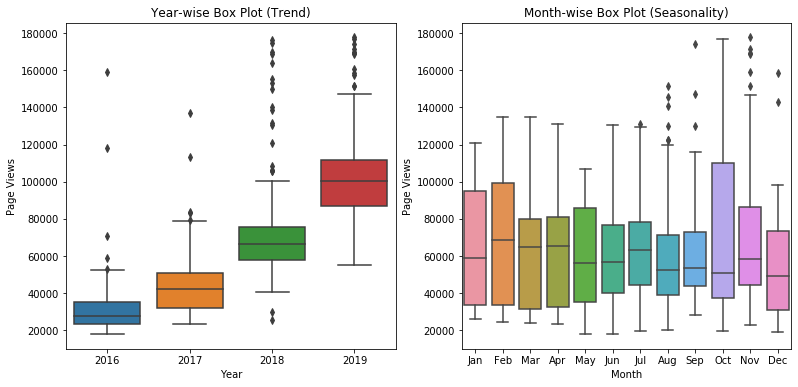

In [27]:
draw_box_plot()